In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [3]:
#import data
data=tf.keras.datasets.fashion_mnist.load_data()
print(data)

4431872/4422102 [==============================] - 0s 0us/step
((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
    

In [4]:
#obtained from tensorflow website, labels of the y class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# load dataset
(X_train, y_train), (X_test, y_test) = data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


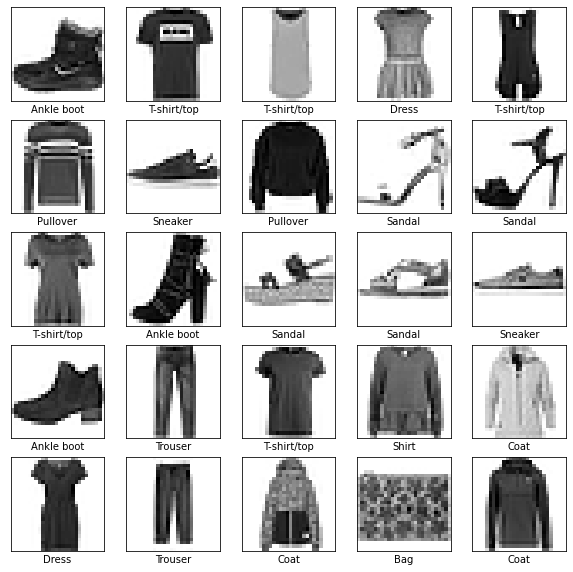

In [6]:
# plot first few images of train set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
#viewing the count of the classes, as a balanced count facilitates better model building
import pandas as pd
i=0
for i in range(10):
    print(i,'y_train: ', list(y_train).count(i))
print('#'*10)
i=0
for i in range(10):
    print(i,'y_test: ', list(y_test).count(i))

0 y_train:  6000
1 y_train:  6000
2 y_train:  6000
3 y_train:  6000
4 y_train:  6000
5 y_train:  6000
6 y_train:  6000
7 y_train:  6000
8 y_train:  6000
9 y_train:  6000
##########
0 y_test:  1000
1 y_test:  1000
2 y_test:  1000
3 y_test:  1000
4 y_test:  1000
5 y_test:  1000
6 y_test:  1000
7 y_test:  1000
8 y_test:  1000
9 y_test:  1000


## Converting lables

In [8]:
seed = 100
np.random.seed(seed)

# load data
data=tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
from tensorflow.compat.v1.keras.utils import to_categorical
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

## Model building

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD

# Model 1

Model 1 is the baseline model. It is a simplistic CNN with default SGD optimizer.
This will be used as a comparison to other models

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

2021-11-25 06:14:00.518055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 06:14:00.608076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 06:14:00.608749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 06:14:00.609834: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
%%time

# Fit the model
history=model.fit(X_train,y_train, validation_data=(X_test,y_test), 
          epochs=10, verbose=2, batch_size=100)

2021-11-25 06:14:03.032546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-11-25 06:14:04.245948: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


600/600 - 8s - loss: 0.6577 - accuracy: 0.7741 - val_loss: 0.5018 - val_accuracy: 0.8286
Epoch 2/10
600/600 - 1s - loss: 0.4670 - accuracy: 0.8361 - val_loss: 0.4369 - val_accuracy: 0.8480
Epoch 3/10
600/600 - 1s - loss: 0.4211 - accuracy: 0.8515 - val_loss: 0.4158 - val_accuracy: 0.8519
Epoch 4/10
600/600 - 1s - loss: 0.3909 - accuracy: 0.8625 - val_loss: 0.3997 - val_accuracy: 0.8603
Epoch 5/10
600/600 - 1s - loss: 0.3710 - accuracy: 0.8700 - val_loss: 0.3813 - val_accuracy: 0.8634
Epoch 6/10
600/600 - 1s - loss: 0.3553 - accuracy: 0.8747 - val_loss: 0.3801 - val_accuracy: 0.8648
Epoch 7/10
600/600 - 1s - loss: 0.3415 - accuracy: 0.8792 - val_loss: 0.3595 - val_accuracy: 0.8720
Epoch 8/10
600/600 - 1s - loss: 0.3304 - accuracy: 0.8834 - val_loss: 0.3460 - val_accuracy: 0.8746
Epoch 9/10
600/600 - 1s - loss: 0.3219 - accuracy: 0.8859 - val_loss: 0.3522 - val_accuracy: 0.8753
Epoch 10/10
600/600 - 1s - loss: 0.3112 - accuracy: 0.8895 - val_loss: 0.3399 - val_accuracy: 0.8760
CPU times:

In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 12.40%


Model is fairly accurate, error of 8.81 is considered decent

Viewing of classification report
Precision is decent for for all classes. 

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.80      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.73      0.87      0.79      1000
       Dress       0.86      0.92      0.89      1000
        Coat       0.85      0.71      0.78      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.69      0.69      0.69      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



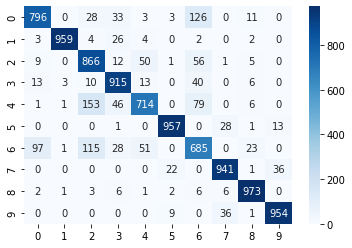

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=class_names))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

Convergence has been met. Changes to model may be necessary to improve error rate

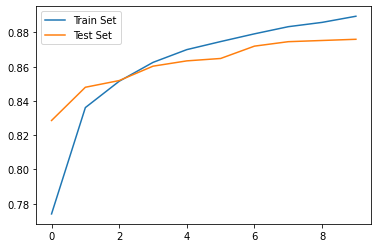

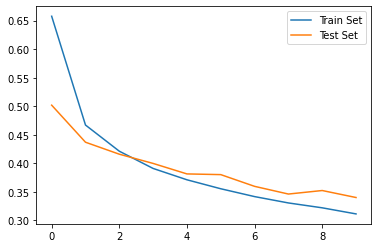

In [15]:
plt.plot(history.history['accuracy'], label='Train Set')
plt.plot(history.history['val_accuracy'], label='Test Set')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Set')
plt.plot(history.history['val_loss'], label='Test Set')
plt.legend()

# Model 2, model 1 but with batch normalisation

In [36]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.02, momentum=0.8)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
%%time

# Fit the model
history=model.fit(X_test, y_test, validation_data=(X_test,y_test), 
          epochs=10, verbose=2, batch_size=100)

Epoch 1/10
100/100 - 1s - loss: 0.5687 - accuracy: 0.8064 - val_loss: 0.7252 - val_accuracy: 0.8117
Epoch 2/10
100/100 - 0s - loss: 0.2696 - accuracy: 0.9025 - val_loss: 0.4109 - val_accuracy: 0.9148
Epoch 3/10
100/100 - 0s - loss: 0.1828 - accuracy: 0.9344 - val_loss: 0.2564 - val_accuracy: 0.9351
Epoch 4/10
100/100 - 1s - loss: 0.1340 - accuracy: 0.9560 - val_loss: 0.1642 - val_accuracy: 0.9508
Epoch 5/10
100/100 - 0s - loss: 0.1026 - accuracy: 0.9662 - val_loss: 0.1023 - val_accuracy: 0.9718
Epoch 6/10
100/100 - 0s - loss: 0.0777 - accuracy: 0.9746 - val_loss: 0.0589 - val_accuracy: 0.9872
Epoch 7/10
100/100 - 1s - loss: 0.0564 - accuracy: 0.9839 - val_loss: 0.0480 - val_accuracy: 0.9864
Epoch 8/10
100/100 - 0s - loss: 0.0485 - accuracy: 0.9880 - val_loss: 0.0329 - val_accuracy: 0.9932
Epoch 9/10
100/100 - 0s - loss: 0.0335 - accuracy: 0.9919 - val_loss: 0.0223 - val_accuracy: 0.9956
Epoch 10/10
100/100 - 1s - loss: 0.0274 - accuracy: 0.9940 - val_loss: 0.0170 - val_accuracy: 0.9978

In [38]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.22%


              precision    recall  f1-score   support

 T-shirt/top       0.99      1.00      1.00      1000
     Trouser       1.00      1.00      1.00      1000
    Pullover       1.00      0.99      1.00      1000
       Dress       1.00      1.00      1.00      1000
        Coat       0.99      1.00      1.00      1000
      Sandal       1.00      1.00      1.00      1000
       Shirt       1.00      0.98      0.99      1000
     Sneaker       1.00      1.00      1.00      1000
         Bag       1.00      1.00      1.00      1000
  Ankle boot       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



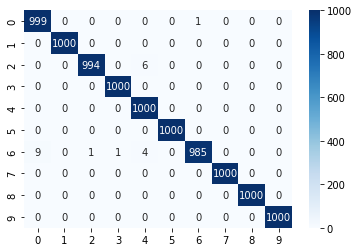

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=class_names))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')
plt.show()

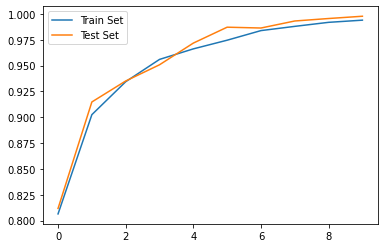

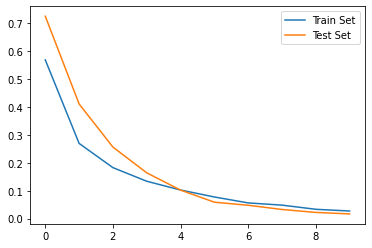

In [40]:
plt.plot(history.history['accuracy'], label='Train Set')
plt.plot(history.history['val_accuracy'], label='Test Set')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Set')
plt.plot(history.history['val_loss'], label='Test Set')
plt.legend()

# Modified complex cnn
# Model 3

As an accurate model has been found, subsequent models will be experiments to see how different CNN architectures and hyperparametes can affect a model

The following model is a more complex CNN, with more Conv2D layers, batchnormalization layeraa and dense layers.

In [21]:
# build the model
# create model
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])



In [22]:
%%time
# Fit the model
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(X_train,y_train, validation_data=(X_test,y_test), 
          epochs=15, batch_size=200, verbose=2, callbacks=callback)

Epoch 1/15
300/300 - 2s - loss: 0.4520 - accuracy: 0.8429 - val_loss: 1.6378 - val_accuracy: 0.5246
Epoch 2/15
300/300 - 1s - loss: 0.2925 - accuracy: 0.8941 - val_loss: 0.4340 - val_accuracy: 0.8343
Epoch 3/15
300/300 - 1s - loss: 0.2534 - accuracy: 0.9078 - val_loss: 0.3082 - val_accuracy: 0.8834
Epoch 4/15
300/300 - 1s - loss: 0.2258 - accuracy: 0.9176 - val_loss: 0.2970 - val_accuracy: 0.8901
Epoch 5/15
300/300 - 1s - loss: 0.2076 - accuracy: 0.9226 - val_loss: 0.3282 - val_accuracy: 0.8808
Epoch 6/15
300/300 - 1s - loss: 0.1931 - accuracy: 0.9295 - val_loss: 0.3284 - val_accuracy: 0.8837
Epoch 7/15
300/300 - 1s - loss: 0.1779 - accuracy: 0.9341 - val_loss: 0.2668 - val_accuracy: 0.9036
Epoch 8/15
300/300 - 1s - loss: 0.1660 - accuracy: 0.9387 - val_loss: 0.2878 - val_accuracy: 0.8969
Epoch 9/15
300/300 - 1s - loss: 0.1568 - accuracy: 0.9418 - val_loss: 0.2814 - val_accuracy: 0.8988
Epoch 10/15
300/300 - 1s - loss: 0.1456 - accuracy: 0.9458 - val_loss: 0.3001 - val_accuracy: 0.8949

In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


CNN Error: 9.94%


Better accuracy and a more balanced Precision

              precision    recall  f1-score   support

 T-shirt/top       0.92      0.77      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.92      0.75      0.83      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.86      0.83      0.84      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.63      0.88      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



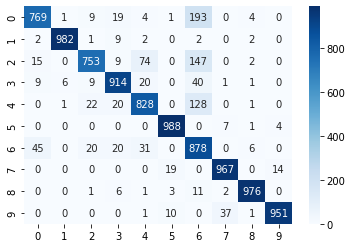

In [24]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=class_names))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')

Plots do not show obvious overfitting

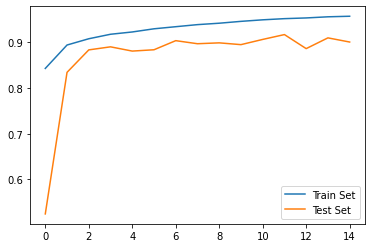

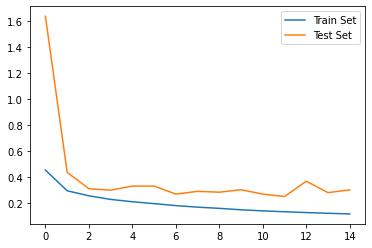

In [25]:
plt.plot(history.history['accuracy'], label='Train Set')
plt.plot(history.history['val_accuracy'], label='Test Set')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Set')
plt.plot(history.history['val_loss'], label='Test Set')
plt.legend()

# Model 3, different fit

Using the previous model, the batch size has increased to 300, and more epochs will be used.

In [1]:
%%time
# Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
history=model.fit(X_train,y_train, validation_data=(X_test,y_test), 
          epochs=35, batch_size=300, verbose=2,callbacks=callback)
# Final evaluation of the model


NameError: name 'tf' is not defined

In [27]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 8.63%


Marginally better accuracy, shirt precision is not ideal. Model can be further improved. 
Tests with othe roptimizers will be implemmented

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.85      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.84      0.87      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.81      0.94      0.87      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.78      0.75      0.76      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.96      0.99      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



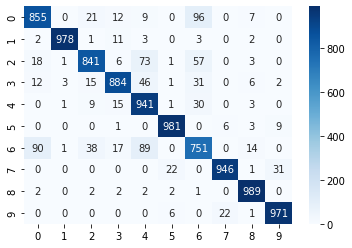

In [28]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=class_names))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')

Shapes of plots are unusual, implying that both train and fit models are quite accurate form the first epoch
Possible final model to consider

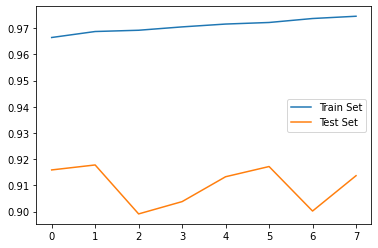

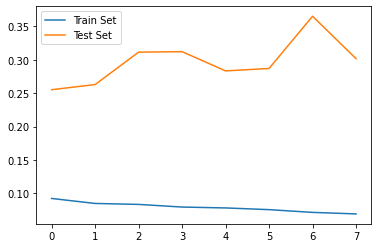

In [29]:
plt.plot(history.history['accuracy'], label='Train Set')
plt.plot(history.history['val_accuracy'], label='Test Set')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Set')
plt.plot(history.history['val_loss'], label='Test Set')
plt.legend()

Worse accuracy than base. May be considered if convergence has not been met for error. 

# Model with data augmentation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
train_data= datagen.flow(X_train, y_train)

# Model 4

In [31]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [32]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(train_data, validation_data=(X_test,y_test), 
          epochs=35, batch_size=200, verbose=2,callbacks=callback)

Epoch 1/35
1875/1875 - 20s - loss: 0.6999 - accuracy: 0.7445 - val_loss: 0.5705 - val_accuracy: 0.7898
Epoch 2/35
1875/1875 - 19s - loss: 0.5341 - accuracy: 0.8030 - val_loss: 0.4491 - val_accuracy: 0.8291
Epoch 3/35
1875/1875 - 19s - loss: 0.4878 - accuracy: 0.8200 - val_loss: 0.4494 - val_accuracy: 0.8378
Epoch 4/35
1875/1875 - 18s - loss: 0.4610 - accuracy: 0.8287 - val_loss: 0.3852 - val_accuracy: 0.8610
Epoch 5/35
1875/1875 - 19s - loss: 0.4456 - accuracy: 0.8351 - val_loss: 0.5771 - val_accuracy: 0.7694
Epoch 6/35
1875/1875 - 18s - loss: 0.4308 - accuracy: 0.8422 - val_loss: 0.4764 - val_accuracy: 0.8370
Epoch 7/35
1875/1875 - 19s - loss: 0.4227 - accuracy: 0.8431 - val_loss: 0.3624 - val_accuracy: 0.8635
Epoch 8/35
1875/1875 - 19s - loss: 0.4113 - accuracy: 0.8488 - val_loss: 0.4104 - val_accuracy: 0.8395
Epoch 9/35
1875/1875 - 19s - loss: 0.4067 - accuracy: 0.8503 - val_loss: 0.3660 - val_accuracy: 0.8679
Epoch 10/35
1875/1875 - 20s - loss: 0.3986 - accuracy: 0.8529 - val_loss:

In [33]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 16.63%


Worse accuracy on error, possible underfitting

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.60      0.71      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.88      0.50      0.64      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.73      0.70      0.72      1000
      Sandal       0.96      0.99      0.97      1000
       Shirt       0.47      0.81      0.59      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.86      0.83      0.84     10000
weighted avg       0.86      0.83      0.84     10000



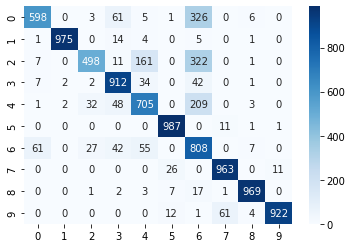

In [34]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=class_names))
g=sns.heatmap(confusion_matrix(actualL, predictedL), annot=True, fmt='d', cmap='Blues')

Convergence has been met and does not diverge. May be the best model for this dataset

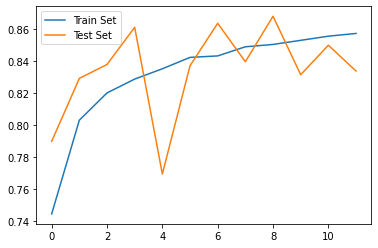

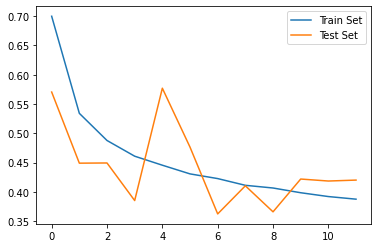

In [35]:
plt.plot(history.history['accuracy'], label='Train Set')
plt.plot(history.history['val_accuracy'], label='Test Set')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Set')
plt.plot(history.history['val_loss'], label='Test Set')
plt.legend()

# Conclusion:

Use model 4 as it is the best model with the best precision and lowest error.